In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

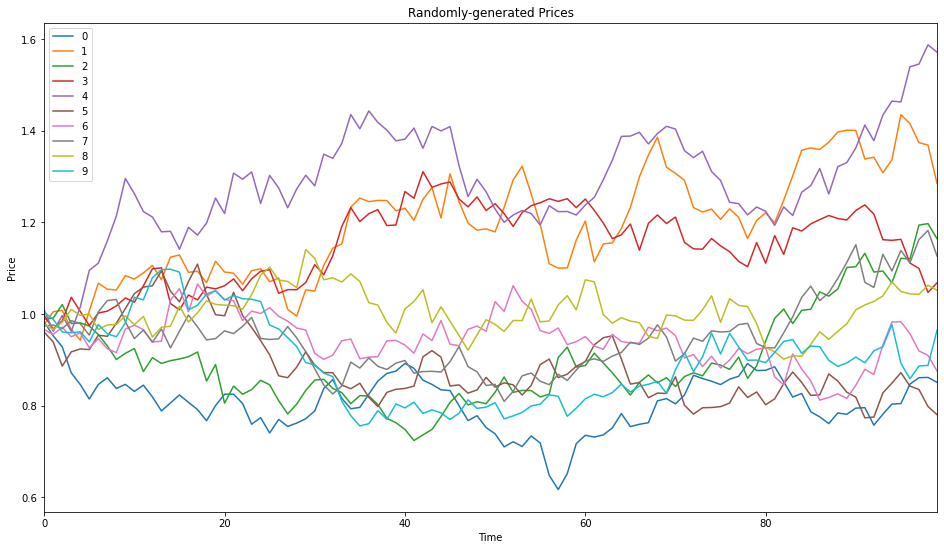

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot(figsize=(16,9))
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# 판다스 자료구조
## Series
판다스의 series 구조는 1차원 어레이 구조를 띄고 있으며 금융 시계열(time series)데이터를 다룰 때 매우 유용하게 사용됩니다. 시리즈는 다음과 같이 pandas.Series() 명령어를 통해 생성할수 있습니다.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [4]:
s.name = "Practice Series"
print(s.name)

Practice Series


위에서 s를 출력하였을때 우리가 지정한 값들이 0,1,2,3,4 라는 숫자에 매칭되어 있는것을 확인할수 있었습니다. 이렇게 데이터 값에 매칭되어 있는 값들을 시리즈의 인덱스(index)라고 합니다. 인덱스를 따로 지정하지 않았다면 기본값인 RangeIndex가 설정됩니다. RangeIndex는 0 부터 시작하는 정수열로 리스트의 순서와 같은 개념으로 이해하시면 됩니다.

In [5]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')

In [7]:
s.index = new_index
s

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Practice Series, dtype: float64

## Series 값들에 접근하기
시리즈가 가지고 있는 데이터 값들에 접근하기 위해서는 iloc[]과 loc[] 명령어에 대한 이해가 필요합니다. iloc[]은 integer location의 약자로 "몇 번째에 있는 데이터에 접근하고 싶다!" 할때 사용합니다. loc[]은 시리즈의 인덱스를 통해 데이터에 접근하고자 할 때 사용됩니다.

In [8]:
s.iloc[0]

1.0

In [9]:
s.iloc[-1]

5.0

In [10]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Practice Series, dtype: float64

In [11]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Practice Series, dtype: float64

## 데이터 필터링
이번에는 데이터값을 필터링하여 특정한 부분에만 접근하고자 할 때 사용할 수 있는 방법들에 대해 알아보도록 하겠습니다. 위에서 생성한 s 라는 시리즈에서 데이터 값이 3보다 작은곳을 확인하고자 할때, 다음과 같이 확인이 가능합니다.

In [12]:
s < 3

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Practice Series, dtype: bool

In [13]:
s.loc[s<3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Practice Series, dtype: float64

In [14]:
s[s<3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Practice Series, dtype: float64

In [16]:
s.loc[(s<3) & (s>1)]

2016-01-02    2.0
Freq: D, Name: Practice Series, dtype: float64

## 시계열 데이터 인덱싱
실제 주식 데이터를 읽어 시계열 데이터를 다루는 법들에 대해 정리해 봅시다. 판다스 데이터리더를 활용하여 애플 주식의 데이터를 읽어옵니다. 설치 방법과 자세한 내용은 (콘텐츠 링크 달기) 를 참고해 주세요.

In [19]:
pip install pandas_datareader


In [21]:
import pandas_datareader as web
symbol = 'AAPL'
start = '2016-01-01'
end = '2019-03-04'
prices = web.DataReader(symbol,'yahoo', start, end)
prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.213585
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.752419
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.878586
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.916473
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.391907


In [22]:
type(prices)

pandas.core.frame.DataFrame

In [24]:
close = prices['Close']
type(close)

pandas.core.series.Series

In [25]:
close.name = 'AAPL_close'
close.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

인덱스가 문자열(str) 타입을 가지고 있습니다. 이렇게 되면 close라는 시리즈를 활용하여 시계열 데이터를 다루는데 어려움이 생기게 됩니다. 시계열 데이터를 손쉽게 다루려면 컴퓨터가 '2016-01-04' 라는 값을 2016년 1월 4일 이라고 인식해야 합니다. 하지만 위의 경우 문자 그대로 '2016-01-04' 라는 문자열 값으로 인식하게 됩니다. 따라서 아래와 같이 pd.to_datetime() 함수를 활용하여 인덱스를 날짜 형태로 바꾸어 주는 작업이 필요합니다.

In [26]:
close.index = pd.to_datetime(close.index)
close.index[0]


Timestamp('2016-01-04 00:00:00')

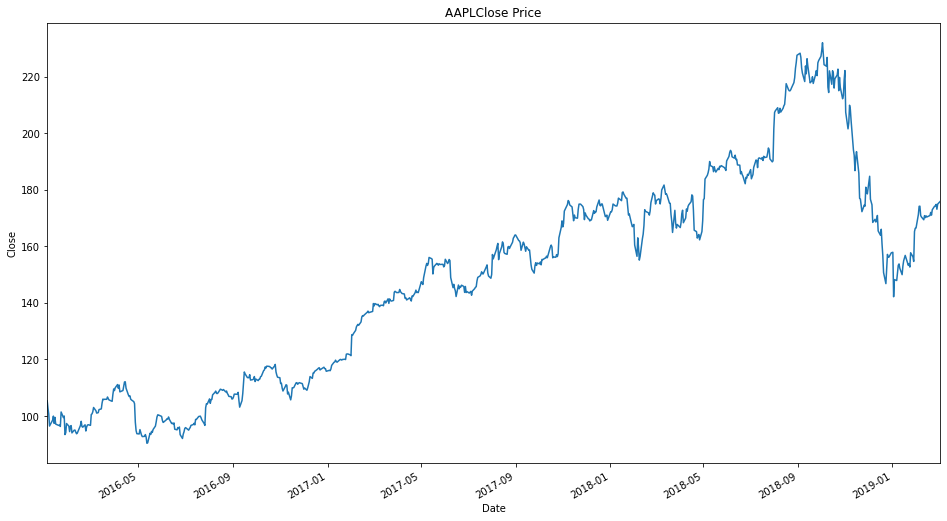

In [27]:
close.plot(figsize=(16,9)); # 그래프의 사이즈를 정해 줍니다.
plt.title(symbol + 'Close Price') # 제목을 설정합니다.
plt.ylabel('Close') # y축의 라벨을 설정합니다.
plt.xlabel('Date'); # x축의 라벨을 설정합니다.

시계열 데이터 분석에서 많이 사용되는 차분(difference)과 퍼센트 수익률(percent return)을 내장된 함수를 통해 손쉽게 계산이 가능합니다.

𝐷𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒𝑡=𝑃𝑟𝑖𝑐𝑒𝑡−𝑃𝑟𝑖𝑐𝑒𝑡−1
 
diff() 메서드를 사용해 차분(difference)을 쉽게 계산 가능합니다.

Percent Change𝑡=𝑃𝑟𝑖𝑐𝑒𝑡−𝑃𝑟𝑖𝑐𝑒𝑡−1𝑃𝑟𝑖𝑐𝑒𝑡−1
 
pct_change() 메서드를 사용해 퍼센트 수익률(percent return)을 쉽계 계산 가능합니다.

In [0]:
add_returns = close.diff()[1:]
percent_returns = close.pct_change()[1:]

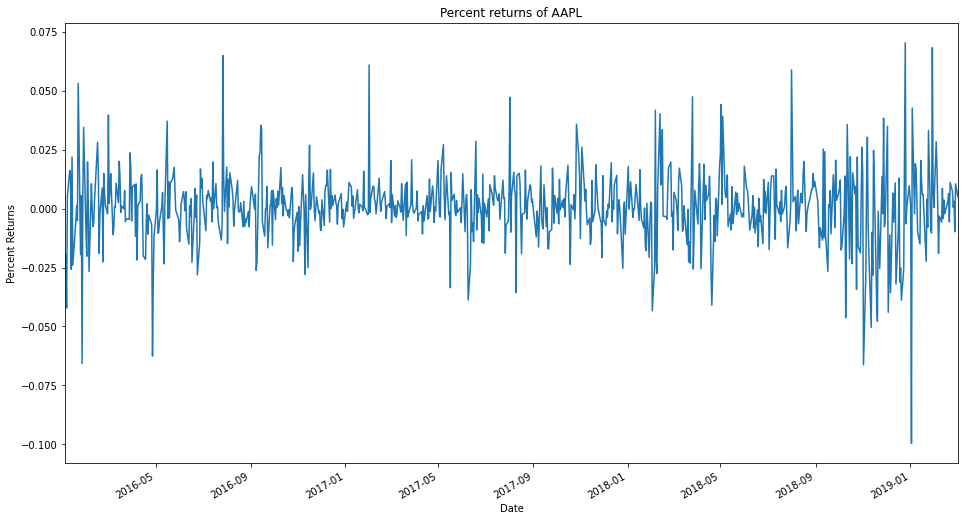

In [29]:
plt.title("Percent returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
percent_returns.plot(figsize=(16,9));

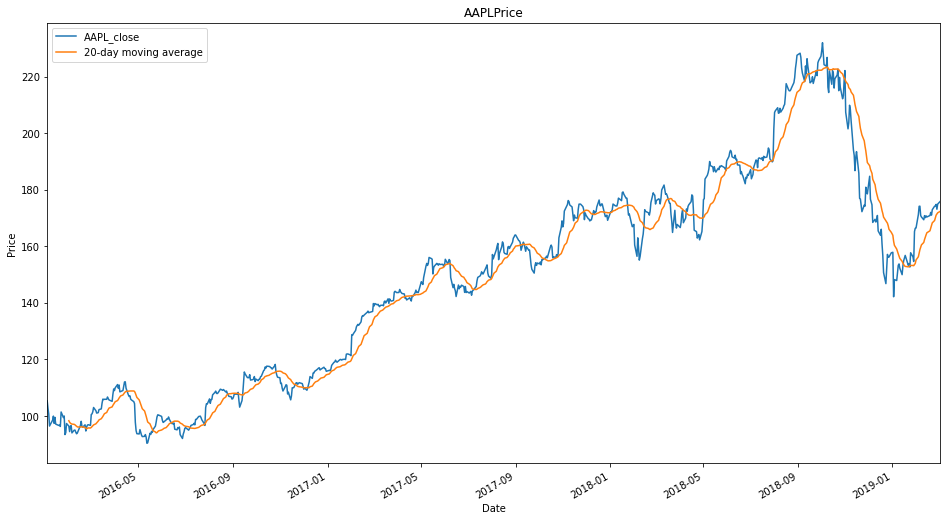

In [30]:
# 20일간의 기간(window)를 설정하여 rolling mean을 계산합니다.
moving_average = close.rolling(window=20).mean()
moving_average.name = '20-day moving average'
close.plot(figsize=(16,9))
moving_average.plot();
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

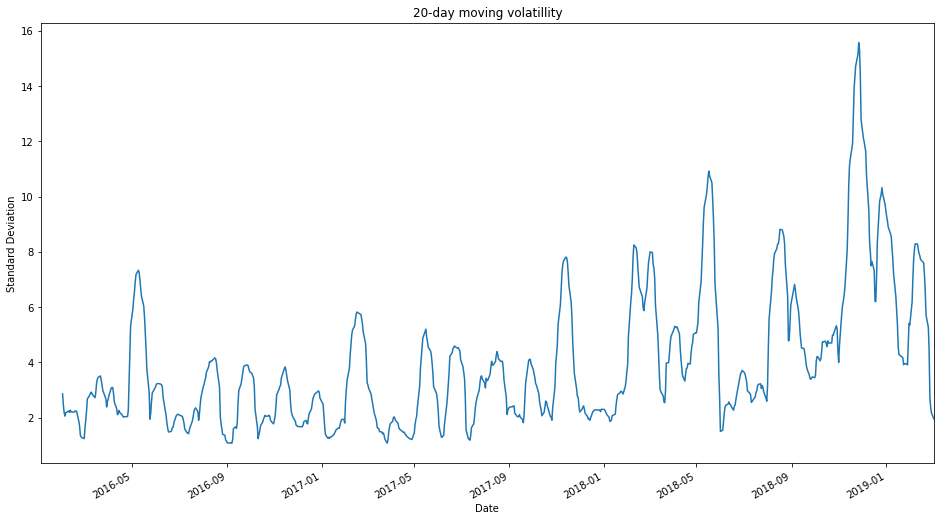

In [31]:
# 표준편차
moving_std = close.rolling(window=20).std()
moving_std.name = '20-day moving volatillity'
moving_std.plot(figsize=(16,9));
plt.title(moving_std.name);
plt.xlabel('Date')
plt.ylabel('Standard Deviation');


In [0]:
open_and_high = prices.loc[:, ['Open', 'High']] # 시가와 고가를 담은 데이터프레임
low_and_close = prices.loc[:, ['Low', 'Close']] # 저가와 종가를 담은 데이터프레임


In [35]:
ohlc = pd.concat([open_and_high, low_and_close], axis=1)
ohlc.head()

,Open,High,Low,Close
Date,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998
2016-01-05,105.750000,105.849998,102.410004,102.709999
2016-01-06,100.559998,102.370003,99.870003,100.699997
2016-01-07,98.680000,100.129997,96.430000,96.449997
2016-01-08,98.550003,99.110001,96.760002,96.959999


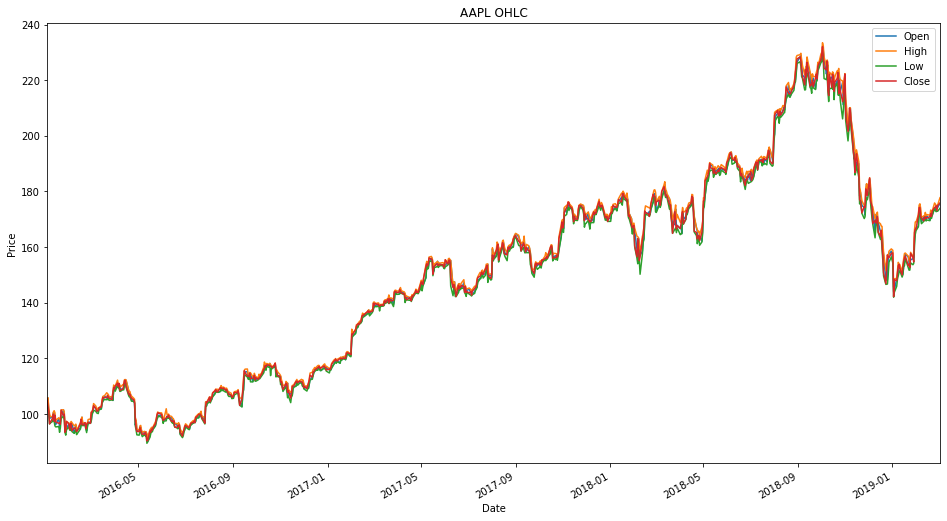

In [36]:
# 캔들차트 그리기는 링크 걸기
ohlc.plot(figsize=(16,9))
plt.title(symbol + ' OHLC')
plt.ylabel('Price')
plt.xlabel('Date');